In [2]:
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil
from fenics import *

import scipy.io as sp
from __future__ import print_function
import mat4py as m4p
import matplotlib.pyplot as plt
import numpy as np
import dolfin as dl
from mat4py import loadmat
from dolfin.cpp.mesh import *

import dolfin as dl
import scipy.io as sp

import numpy as np

import ufl
from dolfin import *
from dolfin.cpp.mesh import *
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mat4py as m4p
import sys



import logging
logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)


In [3]:
#geometry=Rectangle(dl.Point(0.0, 0.0), dl.Point(1, 1))
#mesh = (generate_mesh(geometry,40))

mesh = (UnitSquareMesh(30,30))
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
tol = 1E-14
u_D = Expression('0', degree=2)
def boundary_S(x):
    return  near(x[1], 0.5, tol) and (x[0] > 0.5)

bc_S = DirichletBC(V, u_D, boundary_S)

def boundary_L(x):
    return  near(x[0], 0.0, tol) 

bc_L = DirichletBC(V, u_D, boundary_L)

def boundary_R(x):
    return near(x[0], 1.0, tol) 

bc_R = DirichletBC(V, u_D, boundary_R)

def boundary_B(x):
    return  near(x[1], 0.0, tol) 

bc_B = DirichletBC(V, u_D, boundary_B)

def boundary_T(x):
    return  near(x[1], 1.0, tol) 

bc_T = DirichletBC(V, u_D, boundary_T)

bcs = [ bc_L, bc_R, bc_B, bc_T]

961

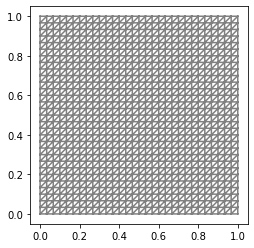

In [4]:
plot(mesh)
len(mesh.coordinates())

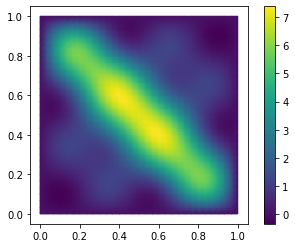

In [7]:
u = TrialFunction(V)
v = TestFunction(V)

#f = Expression('50*(2*sin(pi*x[0])*sin(pi*x[1])-4*sin(2*pi*x[0])*sin(2*pi*x[1])+6*sin(3*pi*x[0])*sin(3*pi*x[1])-8*sin(4*pi*x[0])*sin(4*pi*x[1]))',degree=2)

f = Expression('50*(2*sin(pi*x[0])*sin(pi*x[1])-4*sin(2*pi*x[0])*sin(2*pi*x[1])+6*sin(3*pi*x[0])*sin(3*pi*x[1])-8*sin(4*pi*x[0])*sin(4*pi*x[1]))+25*cos(2*pi*x[0])*cos(2*pi*x[1])',degree=2)

f=interpolate(f,V)





a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution

u = Function(V)


solve(a == L, u, bcs)



#A,b = assemble_system(a,L,bcs)

#U = u.vector()
#solve(A,U,b)

# Plot solution and mesh
c=plot(u,mode='color')
plt.colorbar(c)
plt.show()

In [8]:
# Create model constraint matrix A, load vector b, coordinates x

dof_coordinates = V.tabulate_dof_coordinates() 
n = V.dim()                                                                      
d = mesh.geometry().dim()    

dof_coordinates.resize((n, d))    

#A,b = assemble_system(a,L,bcs)
A = assemble(a)
b = assemble(L)
#[bc.apply(A,b) for bc in bcs]
AA=A.array()

c_train = dof_coordinates

b_new=np.zeros(len(c_train))
for i in range(len(c_train)):
    b_new[i]=b[i]




solution_train=np.zeros(len(c_train))
for i in range(len(c_train)):
    solution_train[i]=u(c_train[i])
    #solution_train[i]=u.vector()[i]

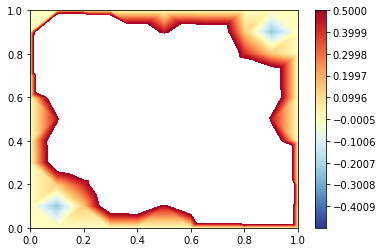

In [233]:
fig = plt.figure()   
#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-0.5, 0.5, 1000)
cs = plt.tricontourf(x, y, solution_train, levels, cmap='RdYlBu_r')
plt.colorbar(cs)

In [231]:
x = c_train[:,0]
y = c_train[:,1]

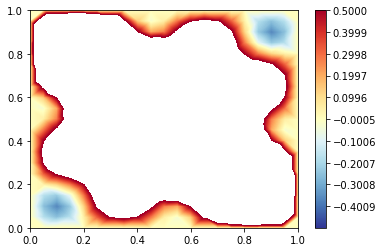

In [145]:
fig = plt.figure()   
#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-0.5, 0.5, 1000)
cs = plt.tricontourf(x, y, solution_train, levels, cmap='RdYlBu_r')
plt.colorbar(cs)

In [248]:
# STORE ALL THE VALUES FOR MODEL CONSTRAINT

# STORE THE STIFFNESS MATRIX AS MAT FILE
savedict = {
    'x' : AA
}
sp.savemat('Stiffness.mat', savedict)

# STORE THE load vector b

bb=list(b_new)
load = {'x': bb}
m4p.savemat('observation.mat', load)

# STORE THE COORDINATES

# STORE THE STIFFNESS MATRIX AS MAT FILE
coordinates = {
    'x' : c_train
}
sp.savemat('Coordinates.mat', coordinates)

solu = {
    'x' : solution_train
}
sp.savemat('Solution.mat', solu)

In [9]:
# Generate training data. Here two sets are there, one is boundary data and the other one is the inside data.

#x_slit = 0.5*np.ones((500, 2))
#xs=np.random.uniform(0.5,1,500)
#x_slit[:,0]=xs

x_right = 1*np.ones((1000, 2))
for i in range(0,1000):
    x_right[i][1]=np.random.uniform(0,1)
    
x_left = 0*np.ones((1000, 2))
for i in range(0,1000):
    x_left[i][1]=np.random.uniform(0,1)
    
x_top = 1*np.ones((1000, 2))
x_top[:,0]=np.random.uniform(0,1,1000)

x_bottom = 0*np.ones((1000, 2))
x_bottom[:,0]=np.random.uniform(0,1,1000)



#mesh_new = dl.refine(UnitSquareMesh(20, 20))
coordinates_train_inside = np.zeros((1000, 2))

for i in range(0,1000):
    coordinates_train_inside [i]=[np.random.uniform(0.4,0.6),np.random.uniform(0.4,0.6)]
    
#for i in range(2000,3990):
 #   coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0.5,1)]

#for i in range(0,4000):
 #   coordinates_train [i]=[np.random.uniform(0.0,0.5),np.random.uniform(0.0,1)]
    
#for i in range(3000,4000):
 #   coordinates_train [i]=[np.random.uniform(0.0,0.5),np.random.uniform(0.7,1)]

#for i in range(3000,4000):
 #   coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0.0,0.5)]

#for i in range(3000,4000):
    #coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0.5,1)]
    
c_train=np.concatenate((x_right,x_left,x_top,x_bottom,coordinates_train_inside),axis=0)


np.random.shuffle(c_train)
np.random.shuffle(coordinates_train_inside)

solution_train_total=np.zeros(len(c_train))
for i in range(len(c_train)):
  solution_train_total[i]=u(c_train[i])

solution_train_inside=np.zeros(len(coordinates_train_inside))
for i in range(len(coordinates_train_inside)):
  solution_train_inside[i]=u(coordinates_train_inside[i])

In [238]:
# Generate test data

coordinates_test=np.random.rand(5000,2)
np.random.shuffle(coordinates_test)

solution_test=np.zeros(len(coordinates_test))
for i in range(len(coordinates_test)):
  solution_test[i]=u(coordinates_test[i])


In [15]:
coordinates_train = 0.5*np.ones((500, 2))

In [239]:
# Generate plot data for ploting true solution
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)

d = []
for i in range(0,1000):
    for j in range(0,1000):
        dd=[X[i,j],Y[i,j]]
        d.append(dd) 

d=np.array(d)

solution_plot=np.zeros(len(d))
for i in range(len(d)):
  solution_plot[i]=u(d[i])


In [240]:
# Solution at Gauss Points

gauss_points = loadmat('gauss_points_new.mat')
gauss_points=np.array(list(gauss_points.values()))[-1]

solution_gauss=np.zeros(len(gauss_points))
for i in range(len(gauss_points)):
  solution_gauss[i]=u(gauss_points[i])

400

In [51]:
np.savetxt('input_train_total.txt',c_train)
np.savetxt('input_train_inside.txt',coordinates_train_inside)
np.savetxt('input_test.txt',coordinates_test)

In [52]:
np.savetxt('output_train_boundary.txt',solution_train_boundary)
np.savetxt('output_train_inside.txt',solution_train_inside)
np.savetxt('output_test.txt',solution_test)        

In [241]:
np.savetxt('gauss_solution.txt',solution_gauss)

In [12]:
np.savetxt('input_plot_data.txt',d)
np.savetxt('output_plot_data.txt',solution_plot)     

In [10]:
np.savetxt('input_train_total.txt',c_train)
np.savetxt('input_train_inside.txt',coordinates_train_inside)

np.savetxt('output_train_total.txt',solution_train_total)
np.savetxt('output_train_inside.txt',solution_train_inside)